MODUL 4

-Exercici1
Descarrega el dataset: 2021_lloguer_preu_trim.csv
extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

1. Una variable categòrica (Districte o Barri)
2. Una variable numèrica (Preu)
3. Una variable numèrica i una categòrica (Districte i Preu)
4. Dues variables numèriques (Any o Trimestre i Preu)
5. Tres variables (Barri o Districte, Trimestre i Preu)  

-Exercici 2
Exporta els gràfics com imatges o com HTML.



- Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.



In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('2021_lloguer_preu_trim.csv')
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [4]:
df.Lloguer_mitja.unique()  #s'observa que té dos valors un lloguer mitja mensual i altres que és lloguer mensual per m2

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [5]:
#mida del dataframe i tipus de dades
#diu non-null a totes les dades per tant no tenim nulls.
#problema: dades de preu és un objecte (string)-- s'ha de canviar a float

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [6]:
df.isnull().sum() #busco si alguna dada és null

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [7]:
#convertim a flotant la columna preu
#ho deixo com a comentari
#df.Preu.astype(float)

ValueError: could not convert string to float: '--'

Ens dona missatge d'error pq a la columna de preu té uns valors "--"  que no pot transformar a número
Busquem quines dades tenen aquest valor

In [9]:
df[df.Preu=="--"]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
41,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),--
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
53,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),--
55,2021,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),--
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
84,2021,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),--
114,2021,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),--
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
126,2021,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),--


In [10]:
df[df.Preu == '--']. sort_values(by='Nom_Barri')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
130,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
349,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
422,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
265,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
411,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
192,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
338,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--


Veiem que moltes dades tenen en preu aquest valor 

In [11]:
df[df.Preu=="--"].sort_values(by="Nom_Barri")

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
130,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
349,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
422,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
265,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
411,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
192,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
119,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
338,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--
46,2021,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),--


S'observa que d'alguns barris no tenen cap dada. Es decideix eliminar les dades sense preu mitjà

In [12]:
df = df.loc[df.Preu != '--']

In [13]:
df[df.Preu == '--'] #comprovem

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


In [14]:
df.Preu = df.Preu.astype(float)  #transformem a float

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


Per evitar files amb informació redundant lloguer mitjà mensual i lloguer mitjà mensual per metre 2. Podriem dividir en dues columnes però una seria depenent de l'altre, serien colinials
Decidim filtrar el df i seleccionar preu per mes i metre 2

In [16]:
df = df[df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9


Crea almenys una visualització per:

1. Una variable categòrica (Districte o Barri)
2. Una variable numèrica (Preu)
3. Una variable numèrica i una categòrica (Districte i Preu)
4. Dues variables numèriques (Any o Trimestre i Preu)
5. Tres variables (Barri o Districte, Trimestre i Preu)


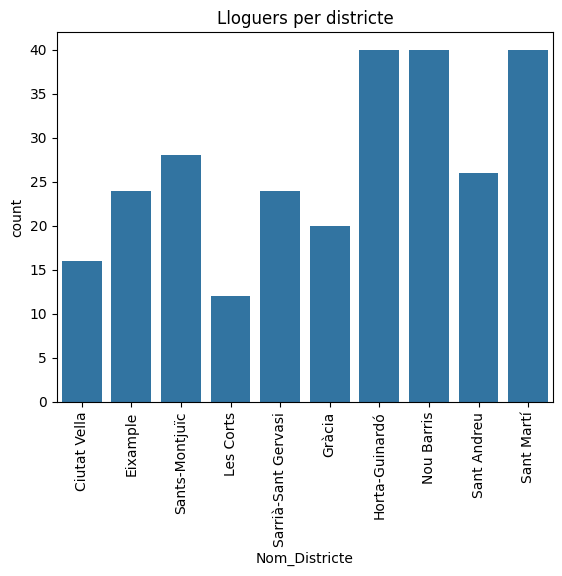

In [35]:
sns.countplot(x='Nom_Districte', data=df)
plt.xticks(rotation=90) #rotar els labels de l'eix x
plt.title("Lloguers per districte")
plt.savefig('LloguerDistricte.png')


A la gràfica s'observa que el major nombre de lloguers comptabilitzats estan als districtes de Nou Barris, Sant Martí i Horta-Guinardó i Les Corts i Ciutat-Vella són on menys lloguers es troben.

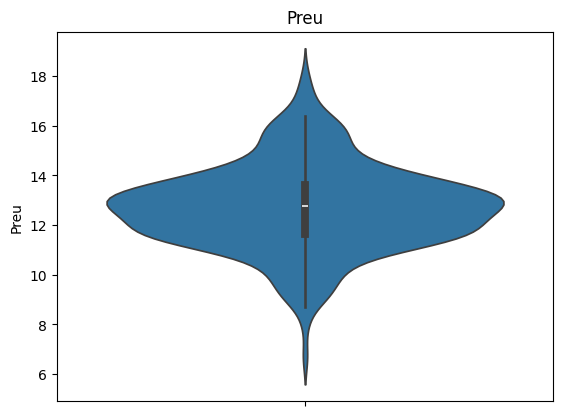

In [36]:
sns.violinplot(data=df,y="Preu")
plt.title("Preu")
plt.savefig('Preu.png')


El gràfic de violí dels preus, mostra com els preus varien entre 6 i 18 €/m2, concentrant-se entre 12-14€/m2.
La distribució sembla una distribució normal. El boxplot de dins es veu com les dades estan força concentrades en els valors centrals 10-14 €/m2


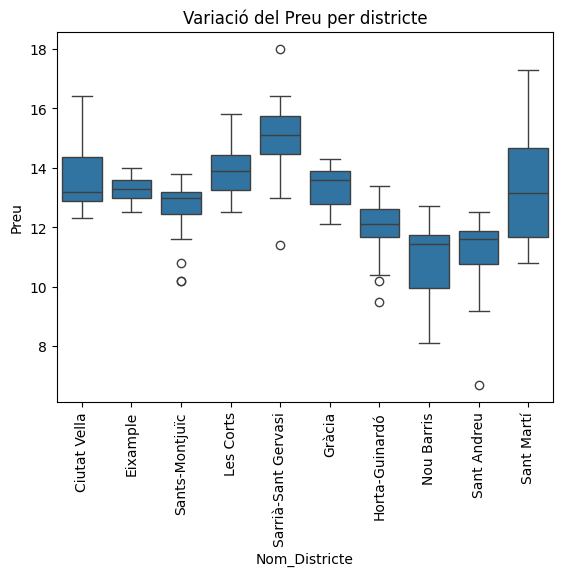

In [37]:
sns.boxplot(data=df,x="Nom_Districte",y="Preu")
plt.xticks(rotation=90) #rotar els labels de l'eix x
plt.title("Variació del Preu per districte")
plt.savefig('VariacioPreuDistricte.png')

Amb aquest gràfic s'observa com els valors de m2 més alt són al districte de Sarrià-Sant Gervasi i els més baixos a Nou Barris. En alguns districtes tenen valors outliers com és sants-montjuïc, sarrià, horta o sant andreu.
Pel que fa al rang al districte de Sant Martí el rang de preus és molt ampli, mentres que a l'Eixample el rang és molt petit. 

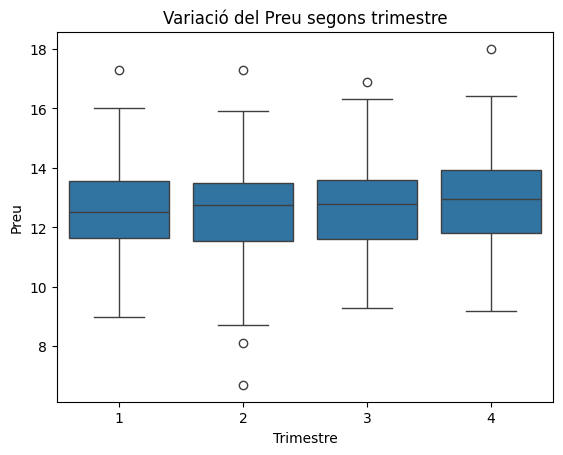

In [38]:
sns.boxplot(data=df,x="Trimestre",y="Preu")
plt.title("Variació del Preu segons trimestre")
plt.savefig('PreuTrimestre.png')

Al representar el Preu en funció del trimestre com a boxplot, s'observen representacions molt semblants amb un lleuger increment del preu mig al 4t trimestre.

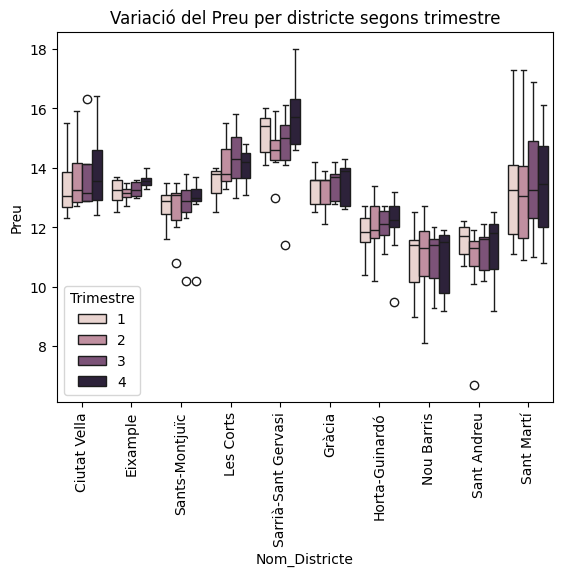

In [39]:
sns.boxplot(data=df,x="Nom_Districte",y="Preu",hue="Trimestre" )
plt.xticks(rotation=90) #rotar els labels de l'eix x
plt.title("Variació del Preu per districte segons trimestre")
plt.savefig('VariacioPreuTrimestre.png')